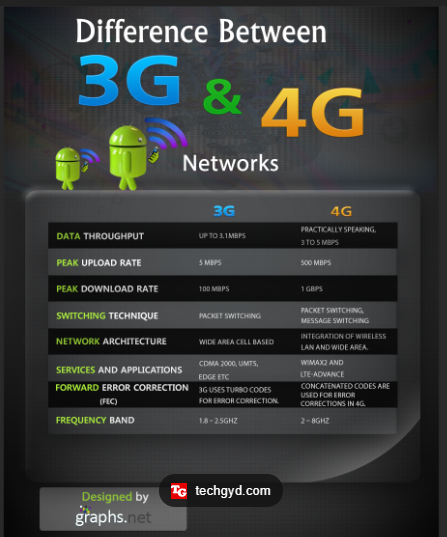

# End to end Data Science Project

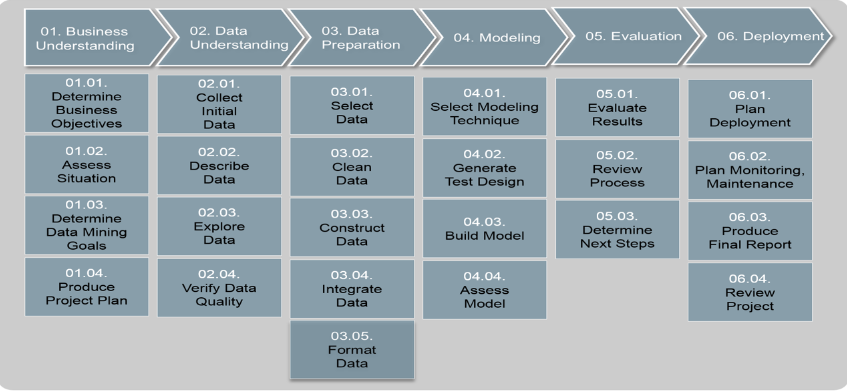

## 1- problem Definition and understanding
The mobile price classification dataset is a dataset containing various attributes of mobile
phones, which can be used to build a machine learning model for predicting price ranges of
mobile devices.

## 1-1 Asking questions
-see statistcal values and if data is outlier

-see affect of each feature on target "price" which is has obvious affect which is small and which has nothing effect on target "price"

-select best features for model

## 2-Data Understanding
Id : ID.

● battery_power : Total energy a battery can store in one time measured in mAh.

● blue : Has bluetooth or not.

● clock_speed : speed at which microprocessor executes instructions.

● dual_sim : Has dual sim support or not.

● fc : Front Camera megapixels.

● four_g : Has 4G or not.

● int_memory : Internal Memory in Gigabytes.

● m_dep : Mobile Depth in cm.

● mobile_wt : Weight of mobile phone.

● n_cores : Number of cores of processor.

● pc : Primary Camera megapixels.

● px_height : Pixel Resolution Height.

● px_width : Pixel Resolution Width.

● ram : Random Access Memory in Megabytes.

● sc_h : Screen Height of mobile in cm.

● sc_w : Screen Width of mobile in cm

● talk_time : longest time that a single battery charge will last.

● three_g : has 3g or not.

● touch_screen : Has touch screen or not

● wifi : has wifi or not.

● price_range: This is the target variable with values of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

### Data wrangling

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
#to plot 3D
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [61]:
df=pd.read_csv("/content/train.csv", encoding='windows-1252')

In [62]:
# set maxmum number of columns
pd.options.display.max_columns= None
# set maxmum number of rows
pd.options.display.max_rows= None


In [63]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [64]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


#### check data type and missing values

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [66]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.1, 'The missing Values in Columns')

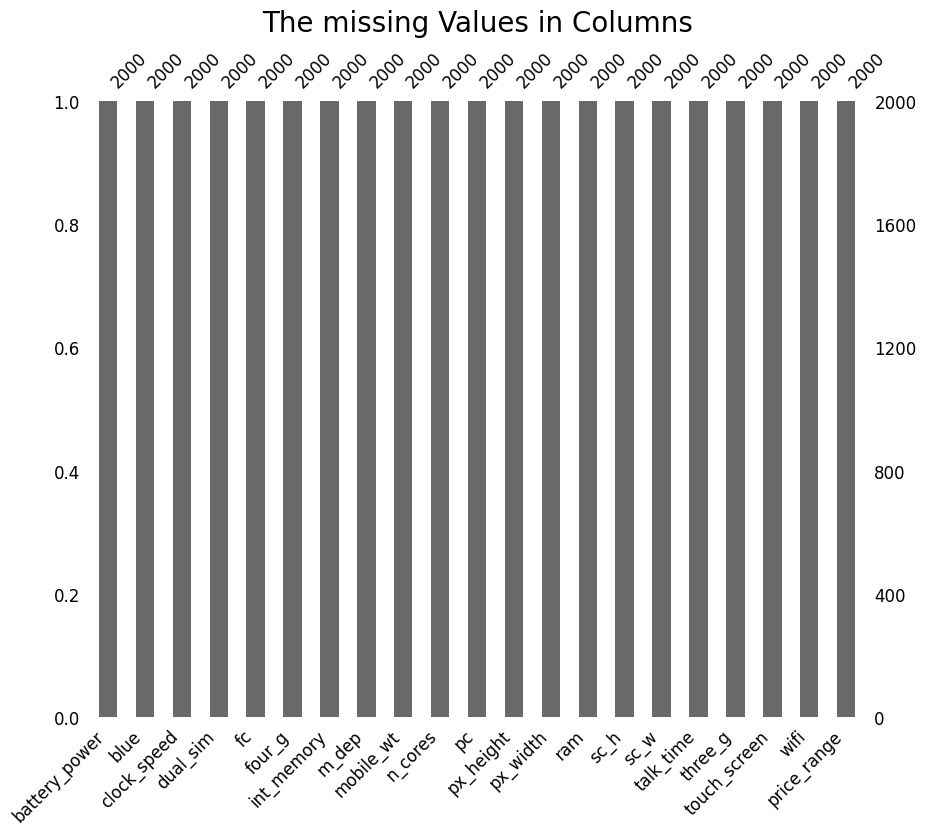

In [67]:
#display that data is clean
msno.bar(df,fontsize=12, figsize=(10,8))
plt.title("The missing Values in Columns", y=1.1, fontsize=20)

In [68]:
#check duplicated
df.duplicated().all()

False

#### some statistical information
Understanding the distribution of the data: The mean, min, max, and other metrics provide a quick overview of the distribution of the data.

Outlier detection: The min, 25%, 75%, and max values can help identify outliers in the data.

Data normalization: The mean and std values can be used to normalize the data.

Feature scaling: The min, max, and other values can be used to scale the features to a suitable range.

In [69]:
df.describe(include="all").style.background_gradient(axis=None, cmap='coolwarm')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.495000,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.500100,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


From this statisticals result the column has not normal values is "ram" this a huge difference between the min and max values that obvious this column has big effect.

## EDA

In [70]:
#check number of uniques value in columns
for features in df.columns:
  print(features,":", df[features].nunique())

battery_power : 1094
blue : 2
clock_speed : 26
dual_sim : 2
fc : 20
four_g : 2
int_memory : 63
m_dep : 10
mobile_wt : 121
n_cores : 8
pc : 21
px_height : 1137
px_width : 1109
ram : 1562
sc_h : 15
sc_w : 19
talk_time : 19
three_g : 2
touch_screen : 2
wifi : 2
price_range : 4


array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

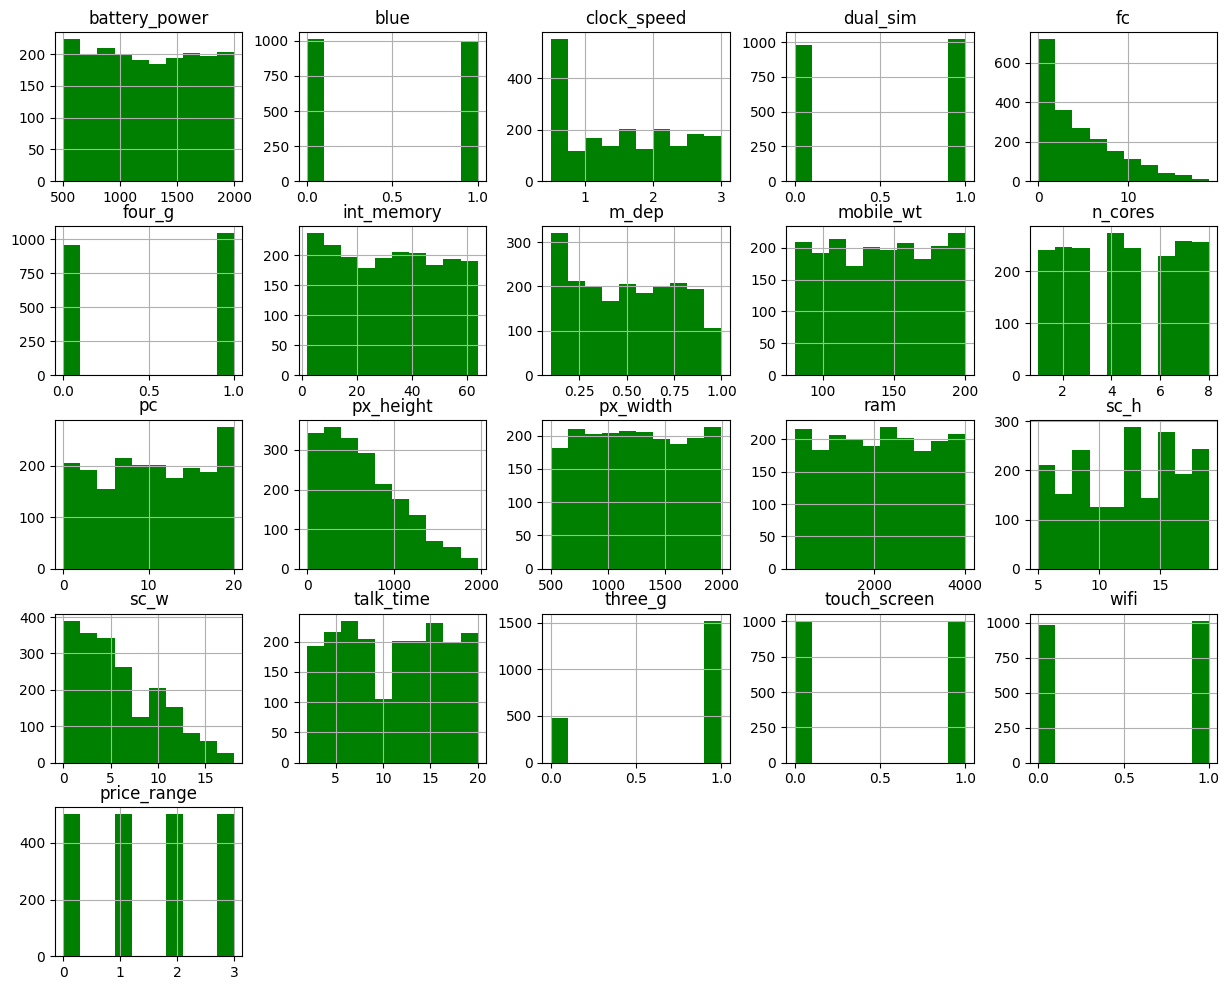

In [71]:
#show distribution of data to check outliers if it exist
df.hist(figsize=(15,12), color="green")

The most of columns have normal distrbutions

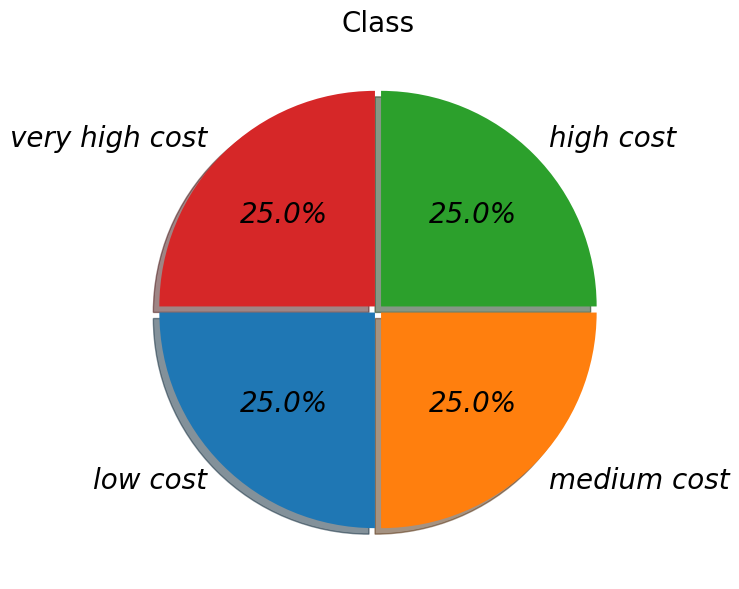

In [72]:
pie=df["price_range"].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=["low cost", "medium cost", "high cost", "very high cost"],
        explode=[0.02,0.02,0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True,
        textprops={"fontsize":20, "style":"italic"})

plt.title('Class', fontsize=20)
plt.show()

###### we notcied here that target column normal distributed not exist oversample in data

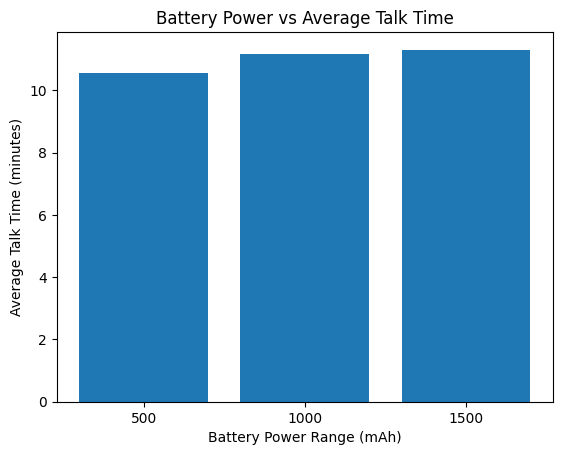

In [73]:
# Calculate the average talk time for each battery power range
# Define the battery power ranges
battery_ranges = [500, 1000, 1500, 2000]
avg_talk_time = []
for i in range(len(battery_ranges)-1):
    lower_bound = battery_ranges[i]
    upper_bound = battery_ranges[i+1]
    avg_talk_time.append(df[(df['battery_power'] >= lower_bound) & (df['battery_power'] < upper_bound)]['talk_time'].mean())

# Plot the average talk time for each battery power range
plt.bar(range(len(avg_talk_time)), avg_talk_time)
plt.xlabel('Battery Power Range (mAh)')
plt.ylabel('Average Talk Time (minutes)')
plt.title('Battery Power vs Average Talk Time')
plt.xticks(range(len(avg_talk_time)), battery_ranges[:-1])
plt.show()

The larger the battery capacity, the longer the battery will keep charging

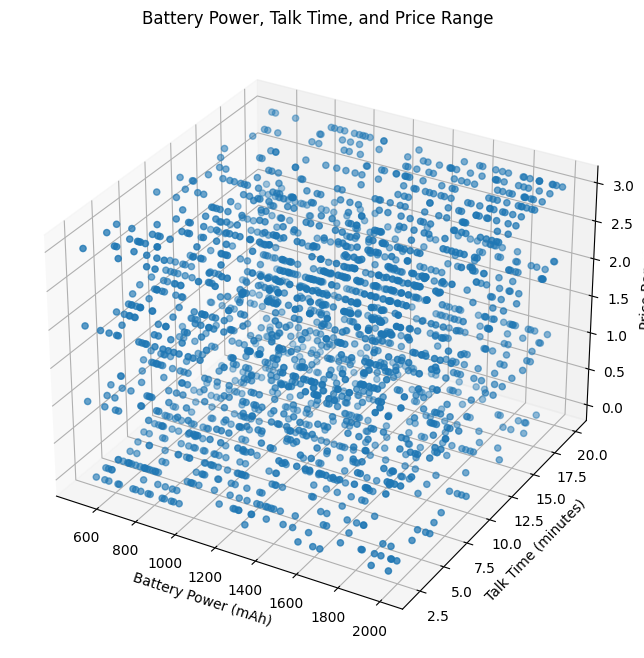

In [74]:
# Create a 3D scatter plot of battery power, talk time, and price range
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['battery_power'], df['talk_time'], df['price_range'])
ax.set_xlabel('Battery Power (mAh)')
ax.set_ylabel('Talk Time (minutes)')
ax.set_zlabel('Price Range')
plt.title('Battery Power, Talk Time, and Price Range')
plt.show()

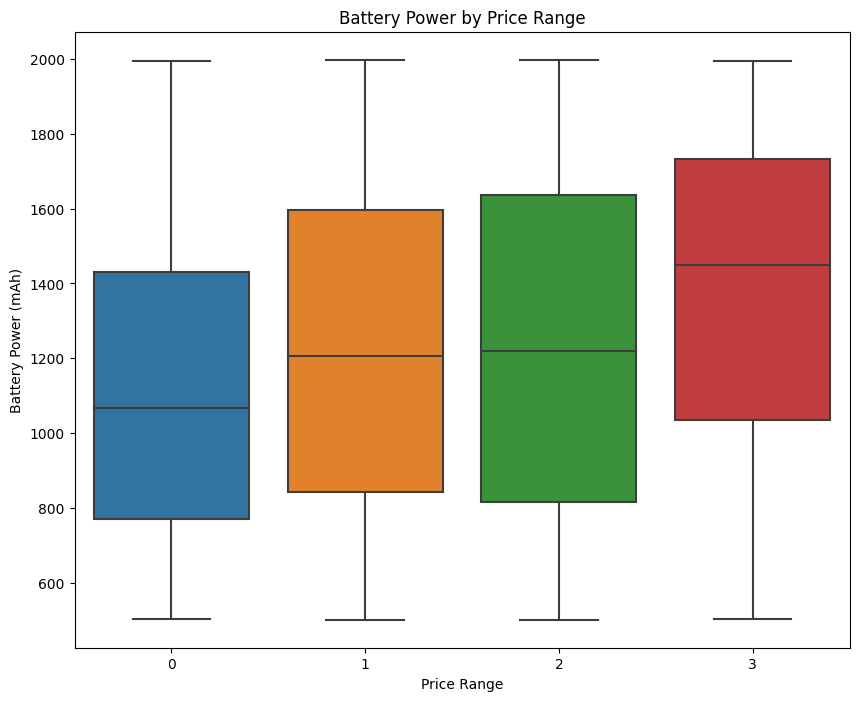

In [75]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='price_range', y='battery_power', data=df, ax=ax)
ax.set_xlabel('Price Range')
ax.set_ylabel('Battery Power (mAh)')
plt.title('Battery Power by Price Range')
plt.show()

Increasing the power of the battery affects the price, so the higher its capacity, the higher its price

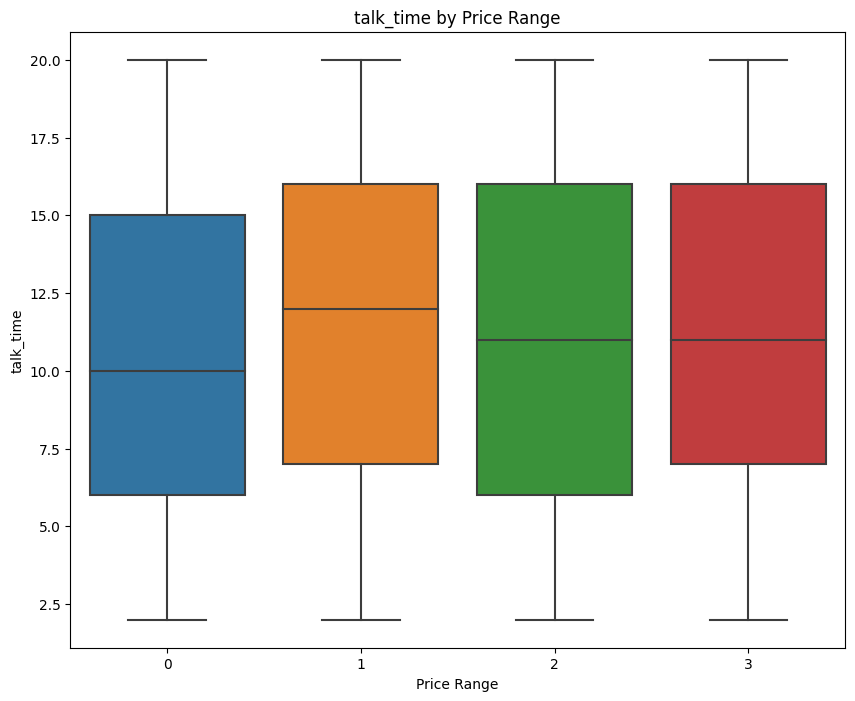

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='price_range', y='talk_time', data=df, ax=ax)
ax.set_xlabel('Price Range')
ax.set_ylabel('talk_time')
plt.title('talk_time by Price Range')
plt.show()

we notice here the time_talk not have big effect on price

<Axes: xlabel='three_g', ylabel='count'>

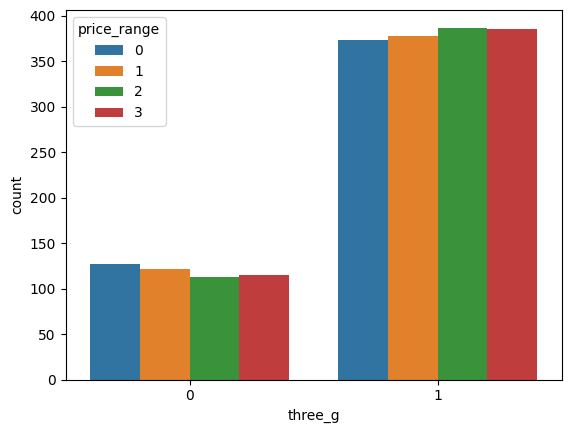

In [77]:
sns.countplot(x='three_g', hue='price_range', data=df)

The little number of phone didn't support 3G but also notice some of expensive phones not support 3G

<Axes: xlabel='four_g', ylabel='count'>

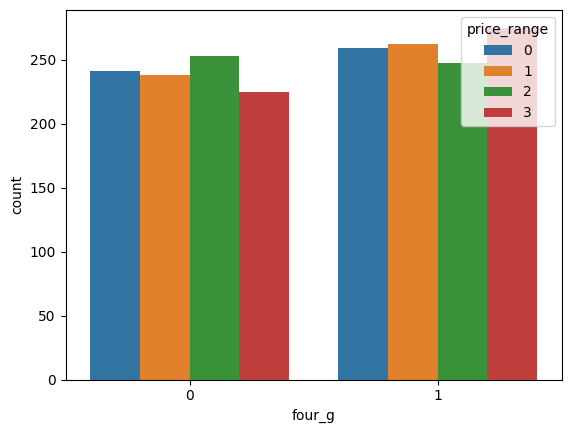

In [78]:
sns.countplot(x='four_g', hue='price_range', data=df)


Here consider the have of records don't support 4G also the large number of expensive mobiles support 4G

<Axes: xlabel='wifi', ylabel='count'>

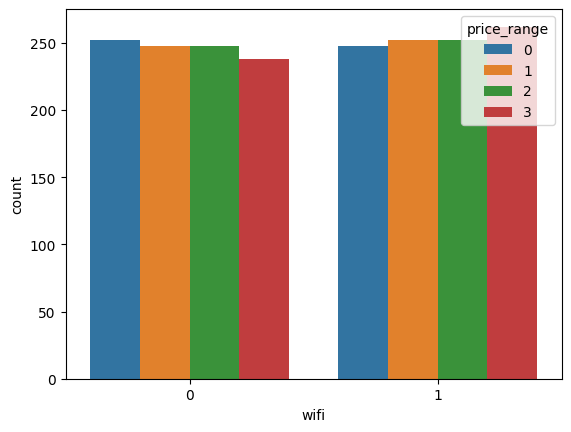

In [79]:
sns.countplot(x='wifi', hue='price_range', data=df)


<Axes: xlabel='touch_screen', ylabel='count'>

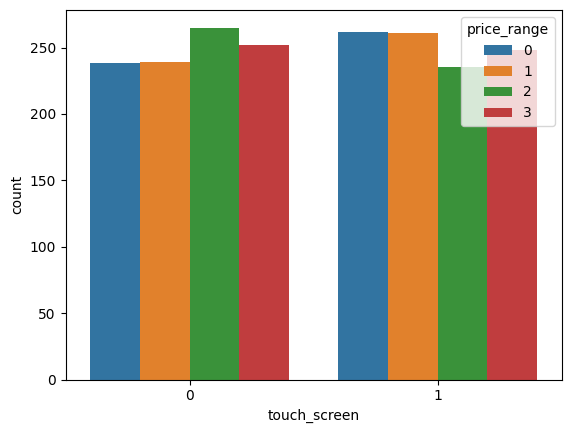

In [80]:
sns.countplot(x='touch_screen', hue='price_range', data=df)


<Axes: xlabel='dual_sim', ylabel='count'>

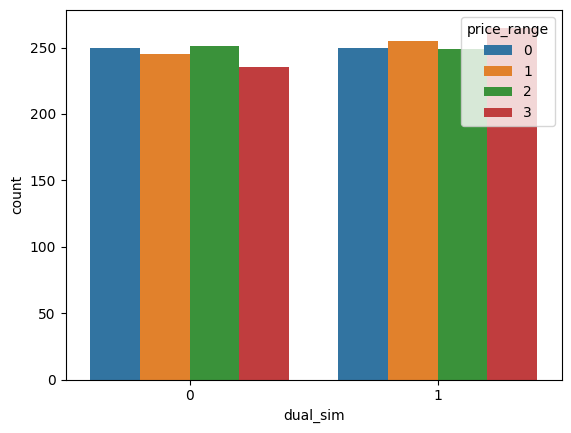

In [81]:
sns.countplot(x='dual_sim', hue='price_range', data=df)


<Axes: xlabel='blue', ylabel='count'>

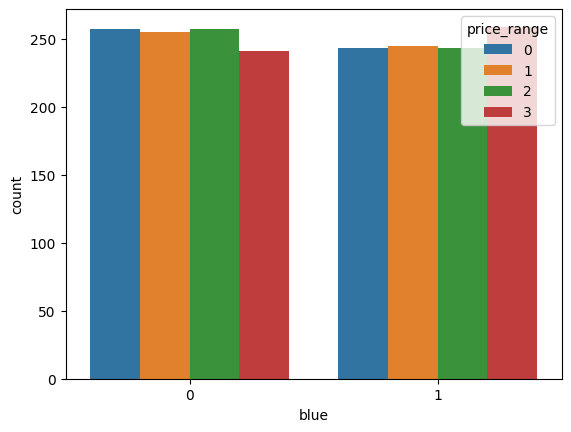

In [82]:
sns.countplot(x='blue', hue='price_range', data=df)


From analysis this columns "blue, dual_sim,touch_screen, wifi" that not have affect on price we notcied that expensive and sheap phones support and not support this services not depend on price

<Axes: xlabel='price_range', ylabel='clock_speed'>

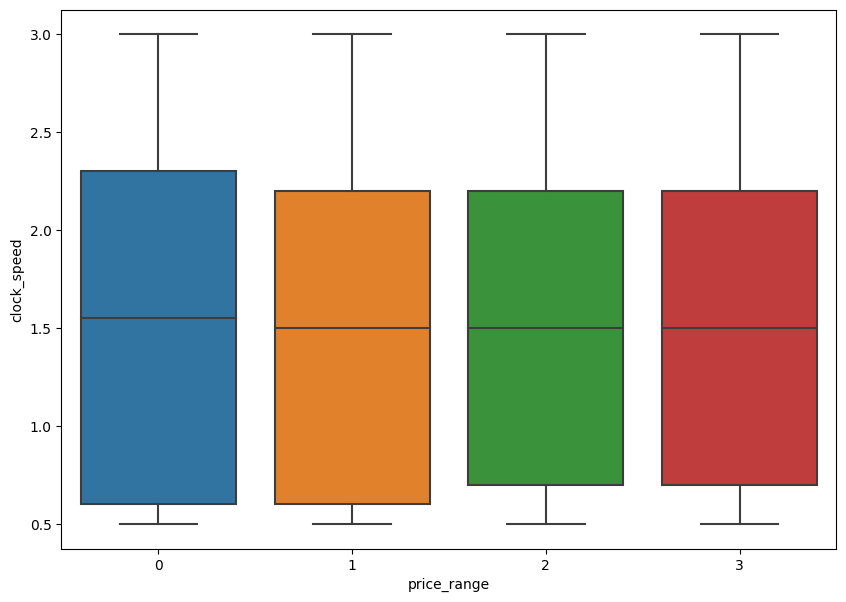

In [83]:
plt.figure(figsize=(10,7))
sns.boxplot(y='clock_speed',x='price_range',data=df)

The clock_speed not affect on price nearly all the phones have the same clock_speed

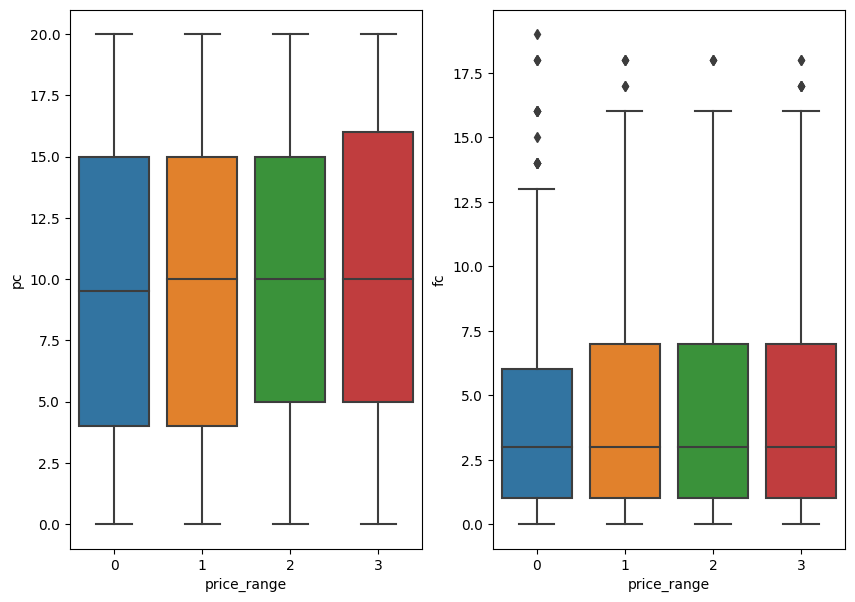

In [84]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='pc', x="price_range")
plt.subplot(1,2,2)
sns.boxplot(data=df, y='fc',x="price_range")
plt.show()

Here I collect between this features to see affect of all properties of cameral on price and notcied that "pc" in all catgorical of phones is equal nut "fc" have little affect The higher the value of "fc", the higher the price

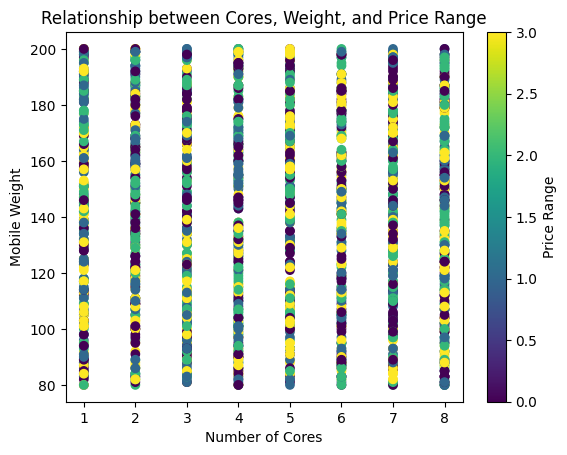

In [85]:
plt.scatter(df['n_cores'], df['mobile_wt'], c=df['price_range'])
plt.xlabel('Number of Cores')
plt.ylabel('Mobile Weight')
plt.title('Relationship between Cores, Weight, and Price Range')
plt.colorbar(label='Price Range')
plt.show()

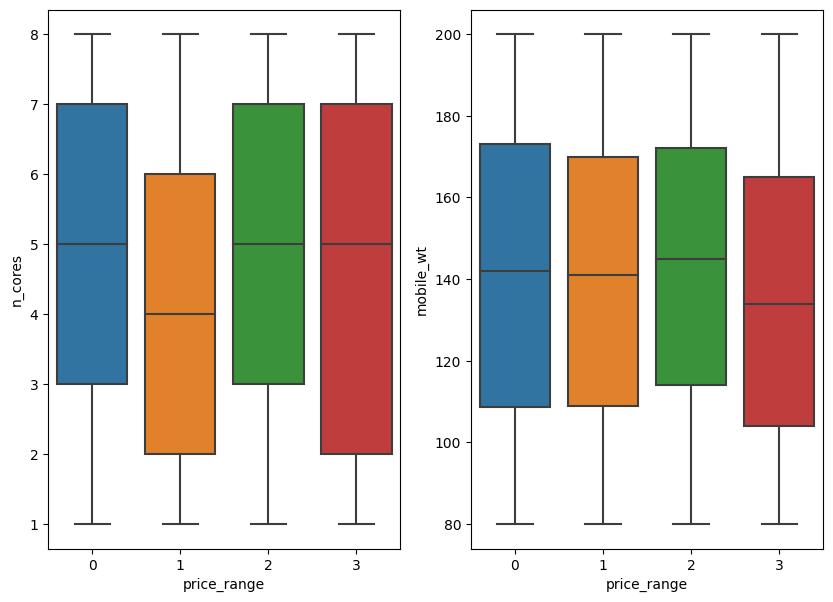

In [86]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='n_cores', x="price_range")
plt.subplot(1,2,2)
sns.boxplot(data=df, y='mobile_wt',x="price_range")
plt.show()

The numbers of cores nearly have the same number of cores in all catgoricals but in catgorical 1 have small number of cores , The mobile weight be little small from anthoer actgorical when the phone become more expensive

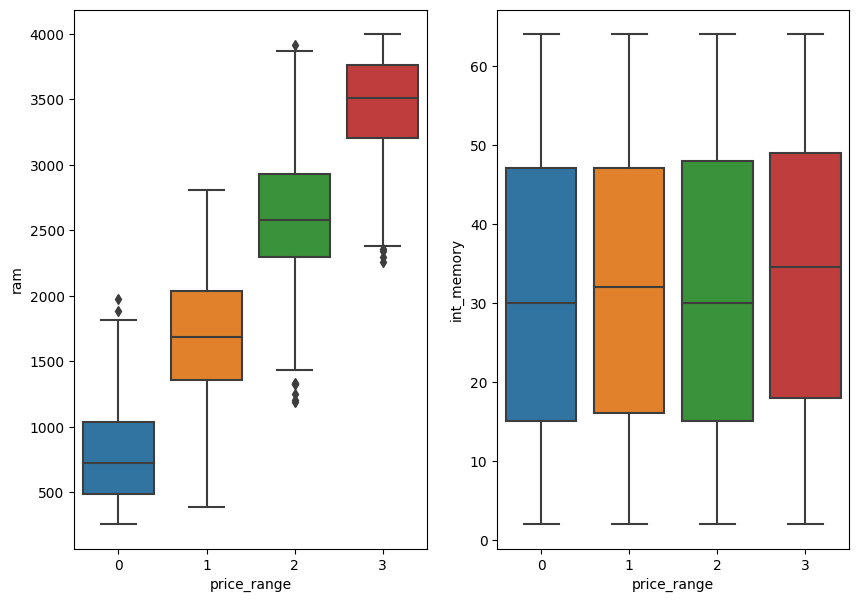

In [87]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='ram', x="price_range")
plt.subplot(1,2,2)
sns.boxplot(data=df, y='int_memory',x="price_range")
plt.show()

Here the ram has large efeect on price The higher the ram, the higher the price ,by anthor hand all catgorical nearly have the same int_memory

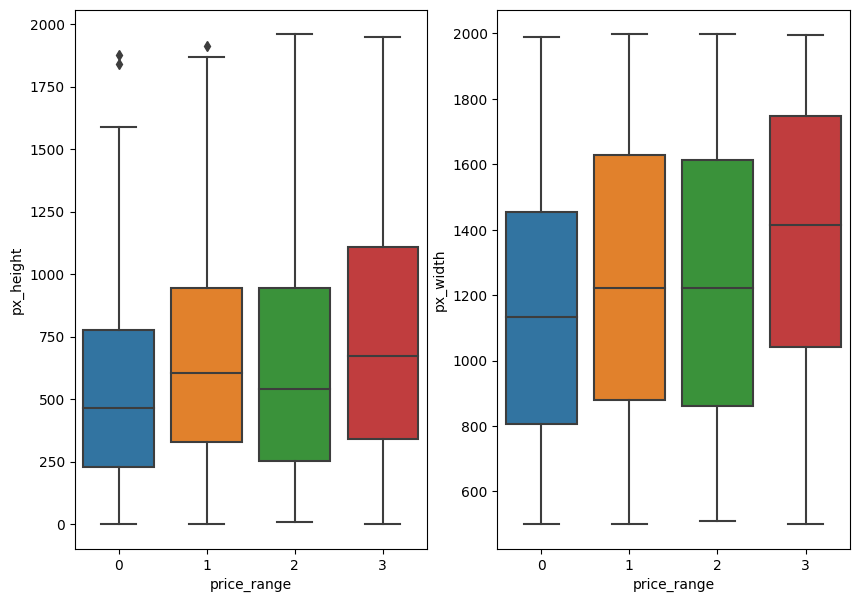

In [88]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='px_height', x="price_range")
plt.subplot(1,2,2)
sns.boxplot(data=df, y='px_width',x="price_range")
plt.show()

The px_height The higher of px_height , the higher of price , and also this affect on px_width

<Axes: >

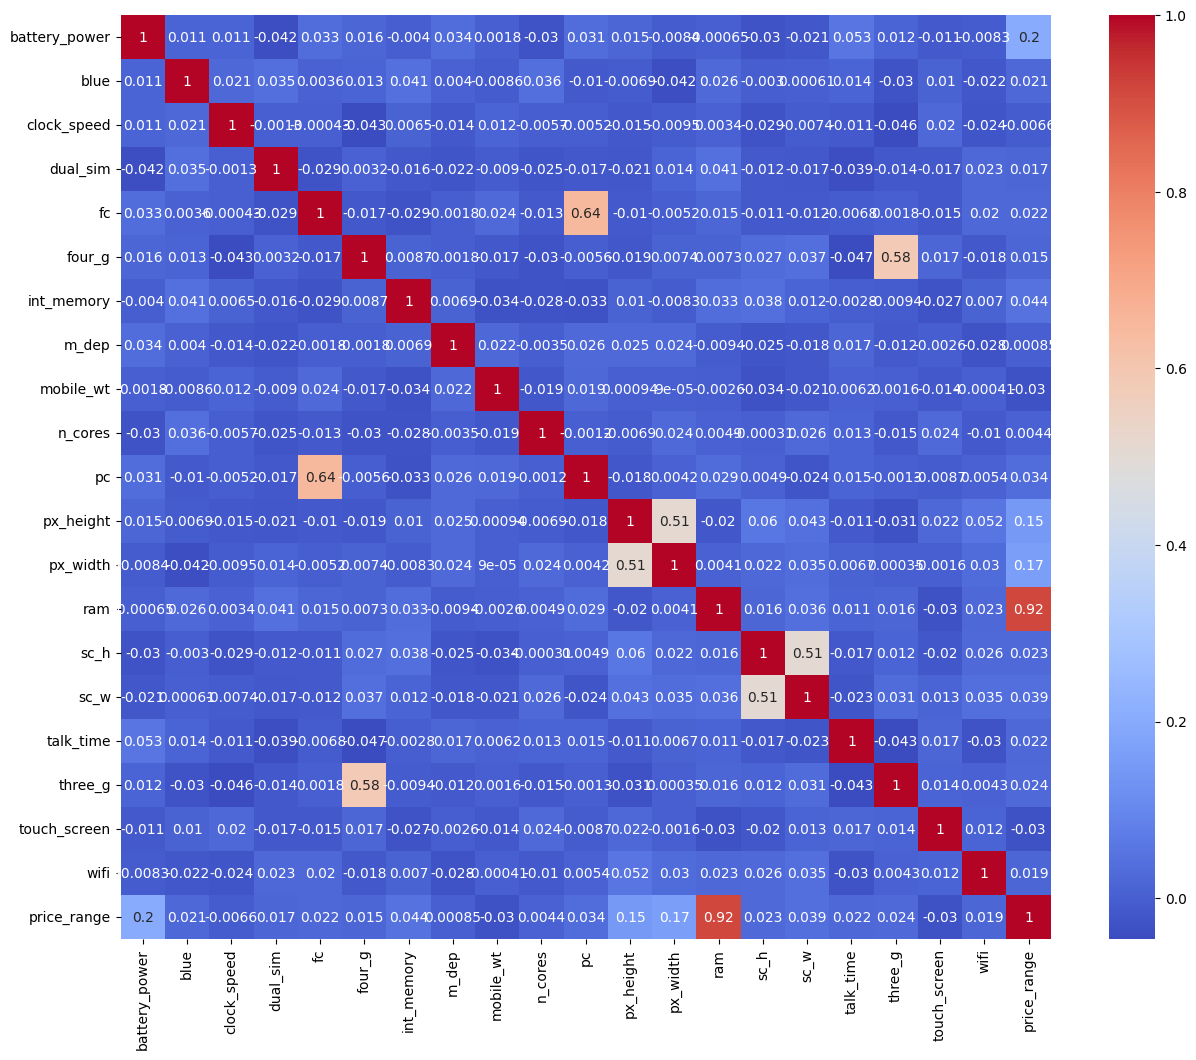

In [89]:
# #check multicordinality by correlation of number columns
plt.figure(figsize=(15,12))
corr_num=df.corr()
sns.heatmap(corr_num, annot=True, cmap='coolwarm')

We notcied here the most column has big correlation with target is "ram"

### Data Preprocessing

In [90]:
#split data
X= df.drop(["price_range"],axis=1)
y=df["price_range"]

##### Feature Selection

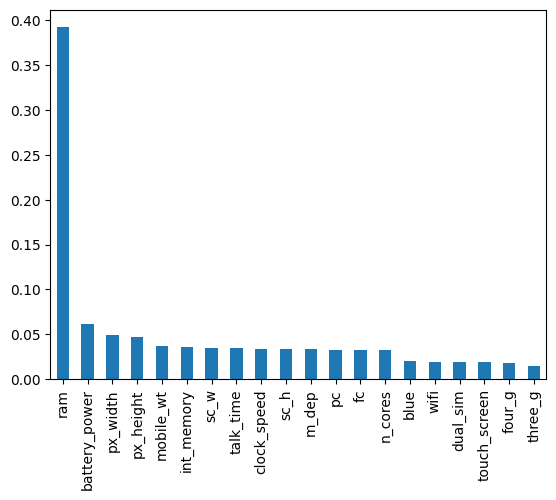

In [91]:
#select best features
from sklearn.ensemble import ExtraTreesClassifier
model =ExtraTreesClassifier()
model.fit(X,y)
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='bar')
plt.show()

Here we can delet some columns like "wifi, touch_screen,four_g,three_g " and train model in anthor feature but i keep them because they have a little effct


In [92]:
#Build Model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [93]:
X_train.shape , X_test.shape

((1600, 20), (400, 20))

In [94]:
#stander scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

start with RandomFOrest because it use to detect if dataset is overfitting if it exist

In [95]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

rf_clf = rf_clf.fit(X_train,y_train)


y_pred = rf_clf.predict(X_test)

y_train_acc = rf_clf.score(X_train, y_train)
y_test_acc = rf_clf.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')
print("Accuracy:",(y_pred))

train_accuracy:1.0
test_accuracy0.8825
Accuracy: [0 2 1 3 1 2 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 2 1 1 3 1 3 1 0 0 1 1 1 2 0 0 1 3 3 1 0 0 3 3 1 2 2 3 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 2 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 3 0 2 1 3 2 1 3 3 0 3 0 2 3 0 2 2 0 3 1 0 0 2 3 0 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 1 2 3 3 3 1 0 0 2 2 3 3 1 0 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 2 0 1 2 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 2 1 3 1
 3 0 0 2 1 2 0 1 1 0 1 3 2 1 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 1 2 2 2 2 0 2 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 1 2 0 3 3 2 3 1 3 2 0 2 1 2 1 0 0 0 3 2 3 1 0 1 0 2 2 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 2 1 1 3 1 0 0 3 3 0 3 0 0 2 0 0 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


In [96]:
from sklearn.metrics import classification_report
report_model_rf = classification_report(y_test, y_pred)
print("Classification Report (RandomForestClassifier):")
print(report_model_rf)

Classification Report (RandomForestClassifier):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.84      0.85      0.84        91
           2       0.80      0.80      0.80        92
           3       0.93      0.91      0.92       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



The result of percision, recall, f1_score and support is good but not optimal try anthor model.
 the model achieved high values for each class, indicating a high percentage of correctly predicted instances. The recall scores are also quite good, demonstrating the model's ability to correctly identify positive instances. The F1-scores, which represent the harmonic mean of precision and recall, are balanced and indicate a good overall performance.

In [97]:
# calculate MAE value indicates the average absolute difference between the predicted and actual values.
from sklearn.metrics import mean_absolute_error
y_pred = rf_clf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.1175


The MAE here is large with this model

If we notcied here we have overfitting with small degree because the presentage of train accuracy is more higher from test accuracy, I'll overcome it by using Hyper-parameter Tuning with GridSearchCV

In [98]:
#Hyper-parameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 20]}

rand_forest = RandomForestClassifier()

grid_search = GridSearchCV(rand_forest, param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'max_depth': 20, 'n_estimators': 200}


In [99]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')
print("Accuracy:",(y_pred))

train_accuracy:1.0
test_accuracy0.8275
Accuracy: [0 2 1 3 1 1 2 0 2 1 0 1 1 3 2 2 3 3 1 0 0 1 1 2 0 1 2 2 2 0 1 0 3 0 1 1 2
 1 3 0 2 3 1 0 2 2 1 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 3 0 0 3 2 2 3 2 1 0 1 3 2 3 3 0 3 3 2 1 3 2 2 3 1 0 0 0 1 1 0 3 2 0 1 1 0
 0 2 1 2 2 3 2 0 2 1 3 2 1 3 3 0 3 1 2 3 0 2 2 0 3 1 0 0 2 3 1 3 3 0 0 0 1
 2 3 3 1 1 0 2 2 0 1 0 1 2 3 3 3 1 0 0 2 2 3 3 1 1 0 3 1 1 2 1 1 0 0 0 0 3
 3 0 3 0 1 0 0 1 3 3 1 0 1 1 1 1 1 2 2 3 3 1 2 0 0 1 2 1 1 3 1 1 3 1 1 3 1
 3 0 0 1 1 3 0 1 2 0 2 3 2 0 1 3 3 0 2 3 3 3 0 3 1 2 3 3 2 0 0 3 3 0 3 3 3
 3 3 0 1 2 2 1 2 0 2 3 2 3 2 1 0 1 0 2 3 1 3 1 0 3 1 2 0 0 3 0 1 3 3 3 3 0
 0 0 1 3 3 0 1 1 2 0 3 3 2 3 1 3 2 0 2 1 1 1 0 0 1 3 3 3 1 0 2 1 1 3 3 1 3
 3 2 1 3 0 0 2 0 3 3 0 1 1 1 0 2 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 2 2 2
 3 3 3 2 1 1 0 3 2 3 3 0 2 3 1 3 3 3 1 0 2 3 0 0 2 3 1 1 1 2]


In [100]:
from sklearn.metrics import classification_report
report_model_dt = classification_report(y_test, y_pred)
print("Classification Report (DecisionTreeClassifier):")
print(report_model_dt)

Classification Report (DecisionTreeClassifier):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       105
           1       0.72      0.84      0.77        91
           2       0.79      0.68      0.73        92
           3       0.89      0.90      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.83      0.83       400



The DecisionTreeClassifier model demonstrated reasonably good performance with respect to precision, recall, and F1-scores for most classes. However, there is room for improvement, particularly for classes 1 and 2, where the precision and recall scores are relatively lower compared to other classes.

In [101]:
# calculate MAE value indicates the average absolute difference between the predicted and actual values.
from sklearn.metrics import mean_absolute_error
y_pred = clf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.1725


This model give large MEA

In [102]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression(max_iter=100)
lg_clf = LogisticRegression()

lg_clf = lg_clf.fit(X_train,y_train)


y_pred = lg_clf.predict(X_test)

y_train_acc = lg_clf.score(X_train, y_train)
y_test_acc = lg_clf.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')
print("Accuracy:",(y_pred))

train_accuracy:0.975625
test_accuracy0.975
Accuracy: [0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 3 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 1 2 2 2 3 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


In [103]:
from sklearn.metrics import classification_report
report_model_lg = classification_report(y_test, y_pred)
print("Classification Report (Logistic Regression):")
print(report_model_lg)

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



In [104]:
# calculate MAE value indicates the average absolute difference between the predicted and actual values.
from sklearn.metrics import mean_absolute_error
y_pred = lg_clf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.025


This the best model because give grat result in precision, recall, f1_score and support also in train and test accuracy .
The MAE is small and this is good

### Evaluation

In [105]:
#cross validation
lg_clf = LogisticRegression()
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rf_clf, X=X, y=y, cv=10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.60 %
Standard Deviation: 1.04 %


In [106]:
#volting
from sklearn.ensemble import VotingClassifier, StackingClassifier,RandomForestClassifier , GradientBoostingClassifier
from lightgbm import LGBMClassifier
estimators = [('lg',RandomForestClassifier()),('lgbm', LGBMClassifier(n_estimators=10, max_depth=7, learning_rate=0.1))]
voting = VotingClassifier(estimators=estimators, voting='soft')
votingC = voting.fit(X_train, y_train)

## Testing
y_train_acc = votingC.score(X_train, y_train)
y_test_acc = votingC.score(X_test, y_test)

print(f'train_score:{y_train_acc}\ntest_score: {y_test_acc}')

train_score:1.0
test_score: 0.885


The best Model by using LogisticRegression Alogrithm

### Pipeline

In [107]:
from sklearn.pipeline import Pipeline
#for feature selection
from sklearn.feature_selection import SelectFromModel

In [108]:
#Define pipeline
pipeline= Pipeline(steps=[
                           ('selector', SelectFromModel(estimator=(ExtraTreesClassifier()))),

                           ('scaler', StandardScaler()),
                           ('model', LogisticRegression())
                         ])

In [109]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('selector', SelectFromModel(estimator=ExtraTreesClassifier())),
                ('scaler', StandardScaler()), ('model', LogisticRegression())])

In [110]:
#plot pipeline
from sklearn.utils import estimator_html_repr
from IPython.display import display, HTML
html = estimator_html_repr(pipeline)
display(HTML(html))

In [111]:
import joblib
joblib.dump(lg_clf, 'train_mobile_model.pkl')

['train_mobile_model.pkl']

In [114]:
from flask import Flask, request, jsonify
import joblib

app = Flask("Mobile Catgorical Price Prediction")

# Load the trained model
model = joblib.load('train_mobile_model.pkl')

# Define a route to handle API requests
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the request
    data = request.json

    # Perform predictions using the loaded model
    predictions = train_mobile_model.predict(df)

    # Return the predictions as a JSON response
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run()

 * Serving Flask app 'Mobile Catgorical Price Prediction'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [116]:
import requests
import json

# Assuming test_data contains the test data
test=pd.read_csv("/content/test.csv")
data = json.dumps(test)

response = requests.post('http://localhost:5000/predict', json=data)
predictions = response.json()